**Making Predictions With Pretrained DeepCell Models**<br>
Both NuclearSegmentation and CytoplasmSegmentation pretrained models were trained on 512x512 images. <br>
The NuclearSegmentation model is trained from a general_nuclear_train_large dataset, which comprises pooled nuclear data from HEK293, HeLa-S3, NIH-3T3, and RAW264.7 cells.<br>
The CytoplasmSegmentation model is trained from a general_cyto dataset, which comprises pooled phase and fluorescent cytoplasm data - computationally curated.<br>
Nuclear model works better than cyto model. <br>

In [4]:
from deepcell.applications import NuclearSegmentation
app = NuclearSegmentation()

In [5]:
print([(layer.name, layer.output_shape) for layer in filter(lambda x: x.name.startswith('semantic_'), app.model.layers)])
vars(app)

[('semantic_0', (None, 512, 512, 1)), ('semantic_1', (None, 512, 512, 1))]


{'model': <keras.engine.functional.Functional at 0x7f1950804940>,
 'model_image_shape': (512, 512, 1),
 'required_rank': 4,
 'required_channels': 1,
 'model_mpp': 0.65,
 'preprocessing_fn': <function deepcell_toolbox.processing.histogram_normalization(image, kernel_size=None)>,
 'postprocessing_fn': <function deepcell_toolbox.deep_watershed.deep_watershed(outputs, radius=10, maxima_threshold=0.1, interior_threshold=0.01, maxima_smooth=0, interior_smooth=1, maxima_index=0, interior_index=-1, label_erosion=0, small_objects_threshold=0, fill_holes_threshold=0, pixel_expansion=None, maxima_algorithm='h_maxima', **kwargs)>,
 'format_model_output_fn': None,
 'dataset_metadata': {'name': 'general_nuclear_train_large',
  'other': 'Pooled nuclear data from HEK293, HeLa-S3, NIH-3T3, and RAW264.7 cells.'},
 'model_metadata': {'batch_size': 64,
  'lr': 1e-05,
  'lr_decay': 0.99,
  'training_seed': 0,
  'n_epochs': 30,
  'training_steps_per_epoch': 62556,
  'validation_steps_per_epoch': 15627},
 'l

In [6]:
appc = CytoplasmSegmentation()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6a244f561b4d37169cb1a58b6029910f so we will re-download the data.
95272960/95263450 [==============================] - 32s 0us/step


In [7]:
print([(layer.name, layer.output_shape) for layer in filter(lambda x: x.name.startswith('semantic_'), appc.model.layers)])
vars(appc)

[('semantic_0', (None, 512, 512, 1)), ('semantic_1', (None, 512, 512, 1))]


{'model': <keras.engine.functional.Functional at 0x7f13611fff10>,
 'model_image_shape': (512, 512, 1),
 'required_rank': 4,
 'required_channels': 1,
 'model_mpp': 0.65,
 'preprocessing_fn': <function deepcell_toolbox.processing.histogram_normalization(image, kernel_size=None)>,
 'postprocessing_fn': <function deepcell_toolbox.deep_watershed.deep_watershed(outputs, radius=10, maxima_threshold=0.1, interior_threshold=0.01, maxima_smooth=0, interior_smooth=1, maxima_index=0, interior_index=-1, label_erosion=0, small_objects_threshold=0, fill_holes_threshold=0, pixel_expansion=None, maxima_algorithm='h_maxima', **kwargs)>,
 'format_model_output_fn': None,
 'dataset_metadata': {'name': 'general_cyto',
  'other': 'Pooled phase and fluorescent cytoplasm data - computationally curated'},
 'model_metadata': {'batch_size': 16,
  'lr': 0.0001,
  'lr_decay': 0.9,
  'training_seed': 0,
  'n_epochs': 8,
  'training_steps_per_epoch': 3949,
  'validation_steps_per_epoch': 986},
 'logger': <Logger Cyto

In [1]:
import numpy as np
from skimage import io
from deepcell.applications import CytoplasmSegmentation
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
%matplotlib inline
from matplotlib import pyplot as plt
import syotil

In [5]:
[(layer.name, layer.output_shape) for layer in filter(lambda x: x.name.startswith('semantic_'), appc.model.layers)]

[('semantic_0', (None, 512, 512, 1)), ('semantic_1', (None, 512, 512, 1))]

(1040, 233)


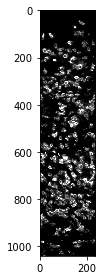

In [14]:
# a rectangular patch that requires tiling
im0 = io.imread('images/test/M872956_JML_Position8_CD3_test_img.png')
print(im0.shape)
im=im0
io.imshow(im)
plt.show()
im = np.expand_dims(im, axis=-1)
im = np.expand_dims(im, axis=0)

(1040, 233)


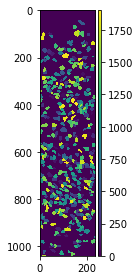

In [15]:
mask_true=io.imread("images/test/M872956_JML_Position8_CD3_test_masks.png")
print(mask_true.shape)
io.imshow(mask_true)
plt.show()

In [23]:
app.model_image_shape

(512, 512, 1)

(1, 1040, 233, 1)
(1, 1568, 512, 1)
{'padding': True, 'x_pad': (264, 264), 'y_pad': (139, 140)}


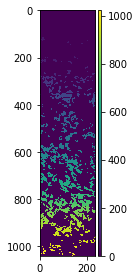

0.1402359108781127

In [16]:
x=im
y, tile_info = app._tile_input(x)
print(x.shape)
print(y.shape)
print(tile_info)
pred = app.predict(y, image_mpp=2) 
prd = app._untile_output(pred, tile_info)
io.imshow(prd[0,:,:,0])
plt.show()
syotil.csi(mask_true, prd[0,:,:,0])
# no image_mpp => 0.2
# image_mpp=1 => 0.37
# image_mpp=2 => 0.14

(256, 256, 3)


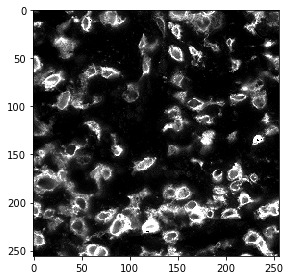

In [9]:
# second example, comparing NuclearSegmentation with CytoplasmSegmentation
im0 = io.imread('images/square_patches/M872956_JML_Position8_CD3_img_patch256x256.png')
print(im0.shape)
im=im0[:,:,2]
io.imshow(im)
plt.show()
im = np.expand_dims(im, axis=-1)
im = np.expand_dims(im, axis=0)

(256, 256)


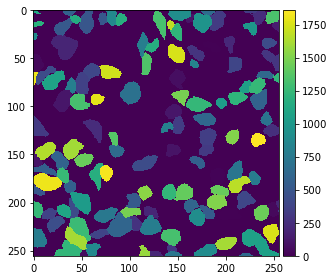

In [10]:
mask_true=io.imread("images/square_patches/M872956_JML_Position8_CD3_masks_patch256x256.png")
print(mask_true.shape)
io.imshow(mask_true)
plt.show()

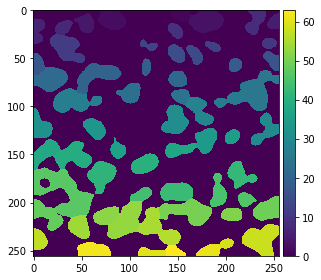

0.20833333333333334

In [11]:
y = app.predict(im)#, image_mpp=1) # set image_mpp to 1 improve to 0.35
io.imshow(y[0,:,:,0])
plt.show()
syotil.csi(mask_true, y[0,:,:,0])

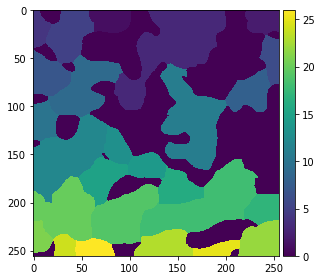

0.006060606060606061

In [12]:
yc = appc.predict(im)#, image_mpp=1) # set image_mpp to 1 improves to 0.01
io.imshow(yc[0,:,:,0])
plt.show()
syotil.csi(mask_true, yc[0,:,:,0])